In [2]:
import pandas as pd

In [4]:
import re
from collections import defaultdict

# Function to parse the log

def parse_log(text):
    data = defaultdict(lambda: defaultdict(list))  # Structure: {model: {input_size: [(train, test), ...]}}
    
    lines = text.strip().split("\n")
    current_model = None
    current_input_size = None
    
    for line in lines:
        line = line.strip()
        
        # Detect model name
        if re.match(r"^[A-Za-z_]+\d*$", line):
            current_model = line
        
        # Detect input sizes
        elif re.match(r"^\d+(,\d+)*$", line):
            current_input_size = line
        
        # Detect RMSE values
        elif "RMSE" in line:
            match = re.search(r"train ([0-9\.]+), test ([0-9\.]+)", line)
            if match and current_model and current_input_size:
                train_rmse, test_rmse = map(float, match.groups())
                data[current_model][current_input_size].append((train_rmse, test_rmse))
    
    return data

import re
from collections import defaultdict

# Function to parse the log from a text file
def parse_log(file_path):
    data = defaultdict(lambda: defaultdict(list))  # Structure: {model: {input_size: [(train, test), ...]}}
    
    with open(file_path, "r") as file:
        lines = file.readlines()
    
    current_model = None
    current_input_size = None
    
    for line in lines:
        line = line.strip()
        
        # Detect model name
        if re.match(r"^[A-Za-z_]+\d*$", line):
            current_model = line
        
        # Detect input sizes
        elif re.match(r"^\d+(,\d+)*$", line):
            current_input_size = line
        
        # Detect RMSE values
        elif "RMSE" in line:
            match = re.search(r"train ([0-9\.]+), test ([0-9\.]+)", line)
            if match and current_model and current_input_size:
                train_rmse, test_rmse = map(float, match.groups())
                data[current_model][current_input_size].append((train_rmse, test_rmse))
    
    return data



In [5]:
# Example usage
file_path = "pinns_training.txt"  # Change this to the actual file path
data = parse_log(file_path)

# Print structured output
for model, sizes in data.items():
    for size, values in sizes.items():
        print(f"Model: {model}, Input Size: {size}, RMSE Pairs: {values}")

Model: MLP_pinn1, Input Size: 5,10,20,40, RMSE Pairs: [(0.22670294697826823, 0.23527015926259937), (0.22685086140568508, 0.23542591237058544), (0.22675461600782817, 0.2352979431549708), (0.22666915784838146, 0.23529201414850023), (0.2268119971734679, 0.23523803913232053), (0.22680387203296998, 0.23532400332918071), (0.2266715427992688, 0.23523556448594488), (0.22681274835229795, 0.23521940470343888), (0.22665559221742207, 0.23531870935300384), (0.22655297549837666, 0.23514562092646205), (0.22663346191635925, 0.23517638956657563), (0.2269077326892932, 0.23530244752012117), (0.22662249841433574, 0.23522563609811994), (0.22678506203123294, 0.2352411752999431), (0.22666898242273073, 0.23531903522183198), (0.22664490123541256, 0.23514351068121014), (0.2265538587474007, 0.23525308162877054), (0.22661163299037076, 0.23521770386382787), (0.22692012768648656, 0.23520616825782892), (0.22661759873765605, 0.23530632182203157), (0.22676021786074183, 0.23525881270567575), (0.2267304986788183, 0.2352

In [11]:
import seaborn as sns

unique_input_sizes = df["Input Size"].unique()
    
for input_size in unique_input_sizes:
    plt.figure(figsize=(10, 6))
    subset = df[df["Input Size"] == input_size]

    sns.lineplot(data=subset, x="Epoch", y="RMSE", hue="Model", style="Type", markers=True)

    plt.title(f"Train-Test RMSE Curves for Input Size {input_size}")
    plt.xlabel("Epochs")
    plt.ylabel("RMSE")
    plt.legend()
    plt.grid()
    plt.show()

NameError: name 'df' is not defined

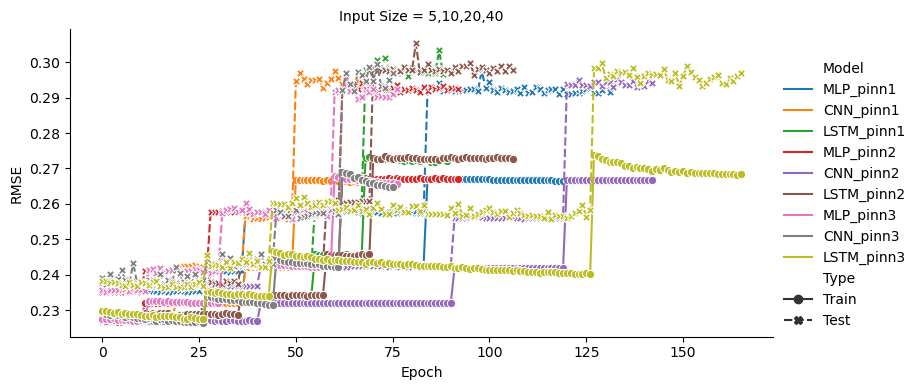

In [14]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

# Function to parse the log from a text file
def parse_log(file_path):
    data = []  # List to store structured data
    
    with open(file_path, "r") as file:
        lines = file.readlines()
    
    current_model = None
    current_input_size = None
    epoch = 0
    
    for line in lines:
        line = line.strip()
        
        # Detect model name
        if re.match(r"^[A-Za-z_]+\d*$", line):
            current_model = line
        
        # Detect input sizes
        elif re.match(r"^\d+(,\d+)*$", line):
            current_input_size = line
            epoch = 0  # Reset epoch counter for new input size
        
        # Detect RMSE values
        elif "RMSE" in line:
            match = re.search(r"train ([0-9\.]+), test ([0-9\.]+)", line)
            if match and current_model and current_input_size:
                train_rmse, test_rmse = map(float, match.groups())
                data.append([current_model, current_input_size, epoch, "Train", train_rmse])
                data.append([current_model, current_input_size, epoch, "Test", test_rmse])
                epoch += 1
    
    df = pd.DataFrame(data, columns=["Model", "Input Size", "Epoch", "Type", "RMSE"])
    return df

# Function to plot train-test curves using Seaborn
# Function to plot train-test curves using Seaborn FacetGrid
def plot_rmse_curves(df):
    g = sns.FacetGrid(df, row="Input Size", sharex=True, sharey=True, height=4, aspect=2)
    g.map_dataframe(sns.lineplot, x="Epoch", y="RMSE", hue="Model", style="Type", markers=True)
    g.add_legend()
    plt.show()



# Example usage
file_path = "pinns_training.txt"  # Change this to the actual file path
df = parse_log(file_path)
plot_rmse_curves(df)


In [33]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to parse the log from a text file
def parse_log(file_path):
    data = []  # List to store structured data
    
    with open(file_path, "r") as file:
        lines = file.readlines()
    
    current_model = None
    input_sizes = []
    input_index = -1  # Track which input size is currently being processed
    epoch = 0  # Track epochs per input size
    rmse_count = 0  # Count RMSE entries per input size
    expected_epochs = 0  # Expected number of epochs per input size
    
    for line in lines:
        line = line.strip()
        
        # Detect model name
        if re.match(r"^[A-Za-z_]+\d*$", line):
            current_model = line
            input_sizes = []  # Reset input sizes when a new model starts
            input_index = -1  # Reset input index
            epoch = 0  # Reset epoch counter
            rmse_count = 0
        
        # Detect input sizes
        elif re.match(r"^\d+(,\d+)*$", line):
            input_sizes = line.split(",")  # Store input sizes as a list
            input_index = 0  # Start from the first input size
            epoch = 0  # Reset epoch counter
            rmse_count = 0
        
        # Detect RMSE values
        elif "RMSE" in line:
            match = re.search(r"train ([0-9\.]+), test ([0-9\.]+)", line)
            if match and current_model and input_sizes:
                train_rmse, test_rmse = map(float, match.groups())
                if 0 <= input_index < len(input_sizes):
                    current_input_size = input_sizes[input_index]  # Assign correct input size
                    data.append([current_model, current_input_size, epoch, "Train", train_rmse])
                    data.append([current_model, current_input_size, epoch, "Test", test_rmse])
                    epoch += 1
                    rmse_count += 1
                
        # Detect transition to a new input size when RMSE count reaches expected_epochs
        elif "Early stopping" in line or "Finished Training" in line:
            if rmse_count > 0 and input_index + 1 < len(input_sizes):  # Move to the next input size
                input_index += 1
                epoch = 0  # Reset epoch counter for the new input size
                rmse_count = 0  # Reset RMSE count for new input size
    
    df = pd.DataFrame(data, columns=["Model", "Input Size", "Epoch", "Type", "RMSE"])
    return df

# Example usage
file_path = "pinns_training.txt"  # Change this to the actual file path
df = parse_log(file_path)

In [34]:
df['mod_type']=df['Model'].apply(lambda x: x.split('_')[0])
df['pinn']=df['Model'].apply(lambda x: x.split('_')[1])

In [35]:
df

,Model,Input Size,Epoch,Type,RMSE,mod_type,pinn
0,MLP_pinn1,5,0,Train,0.226703,MLP,pinn1
1,MLP_pinn1,5,0,Test,0.235270,MLP,pinn1
2,MLP_pinn1,5,1,Train,0.226851,MLP,pinn1
3,MLP_pinn1,5,1,Test,0.235426,MLP,pinn1
4,MLP_pinn1,5,2,Train,0.226755,MLP,pinn1
...,...,...,...,...,...,...,...
1899,LSTM_pinn3,40,36,Test,0.294590,LSTM,pinn3
1900,LSTM_pinn3,40,37,Train,0.268088,LSTM,pinn3
1901,LSTM_pinn3,40,37,Test,0.296055,LSTM,pinn3
1902,LSTM_pinn3,40,38,Train,0.268345,LSTM,pinn3


In [62]:
# Function to plot train-test curves using Seaborn FacetGrid
def plot_rmse_curves(df):
    df["Input Size"] = df["Input Size"].astype(str)  # Ensure input size is treated as a categorical variable
    g = sns.FacetGrid(df, row="Input Size", col = 'pinn', sharex=True, sharey=True, height=3, aspect=1)
    g.map_dataframe(sns.lineplot, x="Epoch", y="RMSE", hue="Type", style="mod_type", markers=True)
    g.add_legend()
    plt.show()



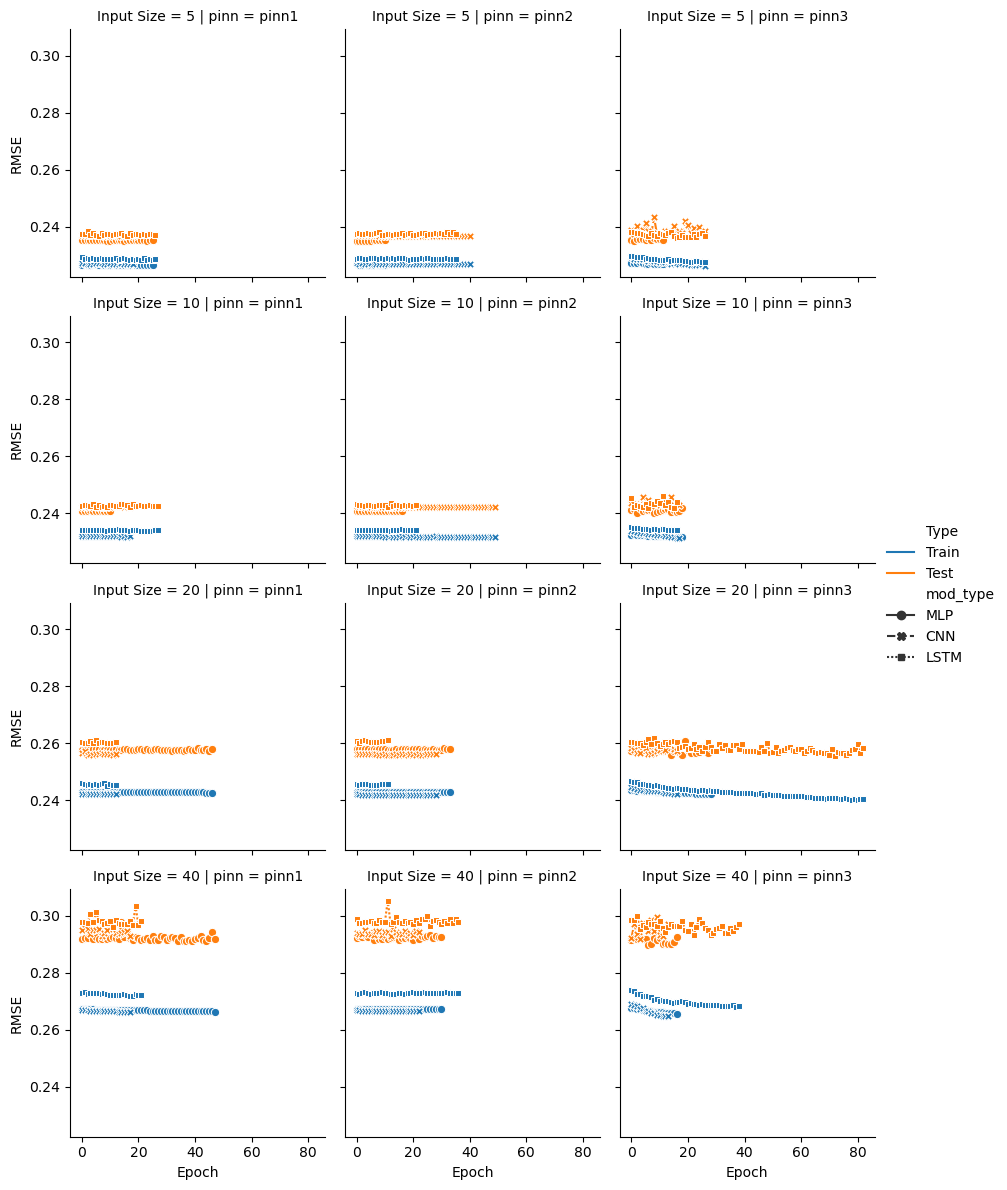

In [63]:
plot_rmse_curves(df)

In [49]:
df

,Model,Input Size,Epoch,Type,RMSE,mod_type,pinn
0,MLP_pinn1,5,0,Train,0.226703,MLP,pinn1
1,MLP_pinn1,5,0,Test,0.235270,MLP,pinn1
2,MLP_pinn1,5,1,Train,0.226851,MLP,pinn1
3,MLP_pinn1,5,1,Test,0.235426,MLP,pinn1
4,MLP_pinn1,5,2,Train,0.226755,MLP,pinn1
...,...,...,...,...,...,...,...
1899,LSTM_pinn3,40,36,Test,0.294590,LSTM,pinn3
1900,LSTM_pinn3,40,37,Train,0.268088,LSTM,pinn3
1901,LSTM_pinn3,40,37,Test,0.296055,LSTM,pinn3
1902,LSTM_pinn3,40,38,Train,0.268345,LSTM,pinn3
